In [79]:
import torch
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# mobilenet_v2_all = models.mobilenet_v2(pretrained=True)
model = torch.load("mobilenet_v2-full.bin",map_location=torch.device("cpu"))

In [23]:
!pip install --upgrade pandas numpy matplotlib seaborn tensorflow lime scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 7.0 MB/s eta 0:00:0000:0100:01
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 MB 4.9 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 10.5 MB/s eta 0:00:00
  Using cached libclang-16.0.0-py2.py3-none-macosx_10_9_x86_64.whl (26.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.2/397.2 kB 8.9 MB/s eta 0:00:00a 0:00:01
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached jax-0.4.8.tar.gz (1.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 8.6 MB/s eta 0:00:0000:0100:01m
  Using c

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.9/317.9 kB 7.4 MB/s eta 0:00:00a 0:00:01
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.7.0-py3-none-macosx_10_9_x86_64.whl (4.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.1 MB/s eta 0:00:0000:0100:01m
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439678 sha256=c59b497dd3c7df453c96adfa4ea6c8fc9e675f334bd4825c148760a38c136f61
  Stored in directory: /Users/saminbatra/Library/Caches/pip/wheels/1c/38/bd/aeb61463337102c2444629583a6e22428ec79f0fb22f746211
Successfully built jax
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimat

In [33]:
import lime
from lime import lime_image
from lime import submodular_pick
from skimage.segmentation import mark_boundaries

from torchvision import models
import torchvision.transforms as transforms
from PIL import Image
import torch.nn.functional as F


In [129]:
model = torch.load("mobilenet_v2-full.bin", map_location=torch.device("cpu"))
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    
])
filename="merc-f1-2023.jpeg"
image = Image.open("static/" + filename)
image = data_transforms(image)
convert_tensor = transforms.ToTensor()
img_tensor = convert_tensor(image)
img_input = img_tensor.unsqueeze(0)
output = model(img_input)

In [130]:
explainer = lime_image.LimeImageExplainer()


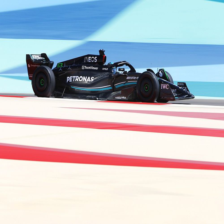

In [131]:
image

In [132]:
def predict(img):
#     img_array = np.array(image)
#     convert_tensor = transforms.ToTensor()
#     img_tensor = convert_tensor(img)
    img_input = torch.tensor(img)
#     print(img_input[0])
    img_input = img_tensor.unsqueeze(0)
    output = model(img_input)
    probs = F.softmax(output, dim=1)
    return probs.detach().cpu().numpy()
   

In [119]:
# predict(np.array(image))

tensor([[203, 204, 204],
        [203, 204, 203],
        [203, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        [203, 204, 203],
        [203, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        [204, 205, 205],
        [204, 204, 204],
        [204, 204, 204],
        [204, 204, 204],
        [204, 205, 205],
        [204, 204, 204],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [204, 204, 204],
        [204, 204, 204],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205],


ValueError: expected 4D input (got 3D input)

In [139]:
exp = explainer.explain_instance(np.array(image), 
                                 predict, 
                                 top_labels=8, 
                                 num_samples=1,num_features=100,random_seed=2023)

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/saminbatra/opt/anaconda3/envs/bt5153env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/saminbatra/opt/anaconda3/envs/bt5153env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/saminbatra/opt/anaconda3/envs/bt5153env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/saminbatra/opt/anaconda3/envs/bt5153env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/saminbatra/opt/anaconda3/envs/bt5153env/l

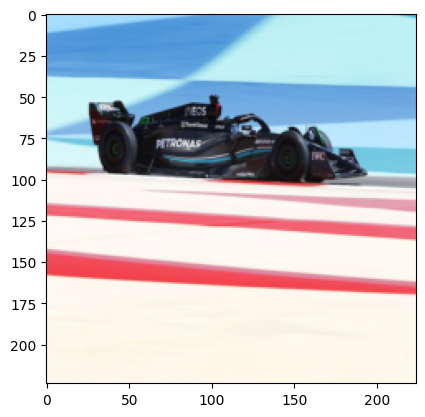

In [135]:
temp, mask = exp.get_image_and_mask(exp.top_labels[0], positive_only=True, num_features=15, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)


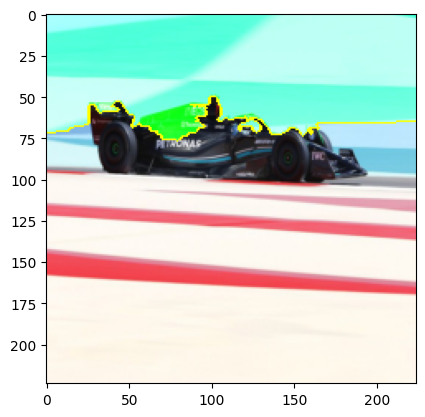

In [136]:
temp, mask = exp.get_image_and_mask(exp.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

In [113]:
img_tensor.shape

torch.Size([3, 224, 224])